## Problem definition
How do economical factors influence health across countries?

## Data acquisition
- Economic factors: agriculture_gdp_pct, industry_gdp_pct, services_gdp_pct
- Source: Gapminder

## Imports

In [56]:
%matplotlib inline

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read, tidy and clean data

In [58]:
# change first column name
def rename_first_column(dataframe):
    dataframe.columns.values[0] = "country"
    
    return dataframe

In [59]:
# melt dataframe to the desired columns
def melt_data(dataframe, column_name):
    dataframe = pd.melt(dataframe,
        id_vars = ["country"],
        var_name = "year",
        value_name = column_name)
                        
    return dataframe

In [72]:
# remove rows where all features are not presented
def drop_na(dataframe, columns):
    dataframe.dropna(subset = columns, how = 'all', inplace = True)
    dataframe.reset_index(drop = True, inplace = True)
    
    return dataframe

In [61]:
agro_data = pd.read_excel("data/agriculture_gdp_pct.xlsx")
agro_data = rename_first_column(agro_data)
agro_data.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


In [62]:
agro_data = melt_data(agro_data, "agriculture")
agro_data.head()

,country,year,agriculture
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN


In [63]:
industry_data = pd.read_excel("data/industry_gdp_pct.xlsx")
industry_data = rename_first_column(industry_data)
industry_data.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.722679,18.650846,23.358852,25.275687,28.204721,25.818468,25.978376,21.214793,22.167053,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.517023,21.085911,21.199999,21.500000,20.298799,19.664773,19.086442,19.358809,19.309736,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,37.72878,41.105581,42.385889,42.263761,...,53.088639,54.817740,56.354391,61.310433,62.297104,61.283007,62.118578,62.123462,62.123462,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
industry_data = melt_data(industry_data, "industry")
industry_data.head()

,country,year,industry
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


In [65]:
services_data = pd.read_excel("data/services_gdp_pct.xlsx")
services_data = rename_first_column(services_data)
services_data.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.118842,35.335311,35.047044,35.243897,39.206221,39.686699,45.887136,47.607657,47.917623,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.171355,54.917882,55.300002,55.700000,57.701201,59.217972,60.608903,60.239255,60.530235,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,49.395007,49.757166,47.28345,46.882862,...,36.907758,34.691024,33.457119,30.467911,29.714108,30.691648,30.961322,30.960967,30.960967,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
services_data = melt_data(services_data, "services")
services_data.head()

,country,year,services
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


In [67]:
agro_data.info(); industry_data.info(); services_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13770 entries, 0 to 13769
Data columns (total 3 columns):
country        13770 non-null object
year           13770 non-null object
agriculture    6361 non-null float64
dtypes: float64(1), object(2)
memory usage: 322.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 3 columns):
country     11076 non-null object
year        11076 non-null object
industry    6349 non-null float64
dtypes: float64(1), object(2)
memory usage: 259.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 3 columns):
country     11076 non-null object
year        11076 non-null object
services    6311 non-null float64
dtypes: float64(1), object(2)
memory usage: 259.7+ KB


In [69]:
# combine dataframes related to economics into one
merge_cols = ['country', 'year']
economy_data = agro_data.merge(industry_data, on = merge_cols, sort = True).merge(services_data, on = merge_cols, sort = True)
economy_data.shape

(10251, 5)

In [70]:
economy_data

,country,year,agriculture,industry,services
0,Afghanistan,1961,NaN,NaN,NaN
1,Afghanistan,1962,NaN,NaN,NaN
2,Afghanistan,1963,NaN,NaN,NaN
3,Afghanistan,1964,NaN,NaN,NaN
4,Afghanistan,1965,NaN,NaN,NaN
5,Afghanistan,1966,NaN,NaN,NaN
6,Afghanistan,1967,NaN,NaN,NaN
7,Afghanistan,1968,NaN,NaN,NaN
8,Afghanistan,1969,NaN,NaN,NaN
9,Afghanistan,1970,NaN,NaN,NaN


In [55]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10251 entries, 0 to 10250
Data columns (total 5 columns):
country        10251 non-null object
year           10251 non-null object
agriculture    6055 non-null float64
industry       5993 non-null float64
services       5955 non-null float64
dtypes: float64(3), object(2)
memory usage: 480.5+ KB


In [73]:
# remove rows where all of the three features are not presented
economy_data = drop_na(economy_data, columns = ['agriculture', 'industry', 'services'])
economy_data.shape

(6169, 5)

In [76]:
economy_data.head(10)

,country,year,agriculture,industry,services
0,Afghanistan,2002,45.158479,19.722679,35.118842
1,Afghanistan,2003,46.013843,18.650846,35.335311
2,Afghanistan,2004,41.594103,23.358852,35.047044
3,Afghanistan,2005,39.480416,25.275687,35.243897
4,Afghanistan,2006,32.589058,28.204721,39.206221
5,Afghanistan,2007,34.494833,25.818468,39.686699
6,Afghanistan,2008,28.134488,25.978376,45.887136
7,Afghanistan,2009,31.177550,21.214793,47.607657
8,Afghanistan,2010,29.915323,22.167053,47.917623
9,Albania,1980,33.600206,44.999999,21.399794


In [77]:
# count the rest NaNs in df
economy_data.isnull().sum()

country          0
year             0
agriculture    114
industry       176
services       214
dtype: int64

In [17]:
# convert year to numeric type
economy_data.year = economy_data.year.astype(int)
economy_data.year.dtype

dtype('int64')

In [18]:
# fill NaN values with the mean value of each column
economy_data.agriculture.fillna(economy_data.agriculture.dropna().mean(), inplace = True)
economy_data.industry.fillna(economy_data.industry.dropna().mean(), inplace = True)
economy_data.services.fillna(economy_data.services.dropna().mean(), inplace = True)

economy_data.shape

(6169, 5)

In [78]:
economy_data.year.nunique()

51

In [79]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 5 columns):
country        6169 non-null object
year           6169 non-null object
agriculture    6055 non-null float64
industry       5993 non-null float64
services       5955 non-null float64
dtypes: float64(3), object(2)
memory usage: 241.1+ KB


In [20]:
carbon_data = pd.read_excel("data/carbon_dioxide_emissions_per_capita.xlsx")
carbon_data = rename_first_column(carbon_data)
carbon_data.head()

,country,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [21]:
carbon_data = melt_data(carbon_data, "carbon_dioxide")
carbon_data.head()

,country,year,carbon_dioxide
0,Abkhazia,1751,NaN
1,Afghanistan,1751,NaN
2,Akrotiri and Dhekelia,1751,NaN
3,Albania,1751,NaN
4,Algeria,1751,NaN


In [22]:
carbon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59455 entries, 0 to 59454
Data columns (total 3 columns):
country           59455 non-null object
year              59455 non-null object
carbon_dioxide    15072 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [23]:
carbon_data = drop_na(carbon_data, columns = ['carbon_dioxide'])
carbon_data.shape

(15072, 3)

In [100]:
carbon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15072 entries, 219 to 59449
Data columns (total 3 columns):
country           15072 non-null object
year              15072 non-null object
carbon_dioxide    15072 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


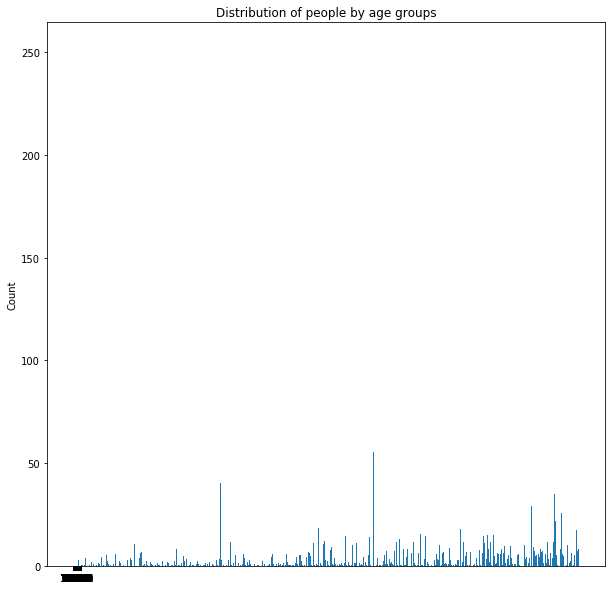

In [97]:
plt.figure(figsize = (10, 10))
plt.title("Distribution of people by age groups")
plt.bar(range(len(carbon_data.carbon_dioxide)), carbon_data.carbon_dioxide)
plt.xticks(range(len(carbon_data.year.unique())), carbon_data.year.unique())
plt.ylabel("Count")
plt.show()

In [101]:
carbon_data.carbon_dioxide.min()

0.0

In [106]:
tr = carbon_data[carbon_data.carbon_dioxide == 0.0]
tr

,country,year,carbon_dioxide
20772,Hungary,1848,0.0
21007,Hungary,1849,0.0
21242,Hungary,1850,0.0
21398,Australia,1851,0.0
21633,Australia,1852,0.0
21868,Australia,1853,0.0
22103,Australia,1854,0.0
22338,Australia,1855,0.0
22573,Australia,1856,0.0
22808,Australia,1857,0.0


In [99]:
carbon_data.year.nunique()

253

In [30]:
test = economy_data.merge(carbon_data, on = merge_cols)
test

,country,year,agriculture,industry,services,carbon_dioxide
0,Afghanistan,2002,45.158479,19.722679,35.118842,0.014583
1,Afghanistan,2003,46.013843,18.650846,35.335311,0.022704
2,Afghanistan,2004,41.594103,23.358852,35.047044,0.027472
3,Afghanistan,2005,39.480416,25.275687,35.243897,0.036780
4,Afghanistan,2006,32.589058,28.204721,39.206221,0.047090
5,Afghanistan,2007,34.494833,25.818468,39.686699,0.068312
6,Afghanistan,2008,28.134488,25.978376,45.887136,0.131602
7,Afghanistan,2009,31.177550,21.214793,47.607657,0.213325
8,Afghanistan,2010,29.915323,22.167053,47.917623,0.262174
9,Albania,1980,33.600206,44.999999,21.399794,1.935387


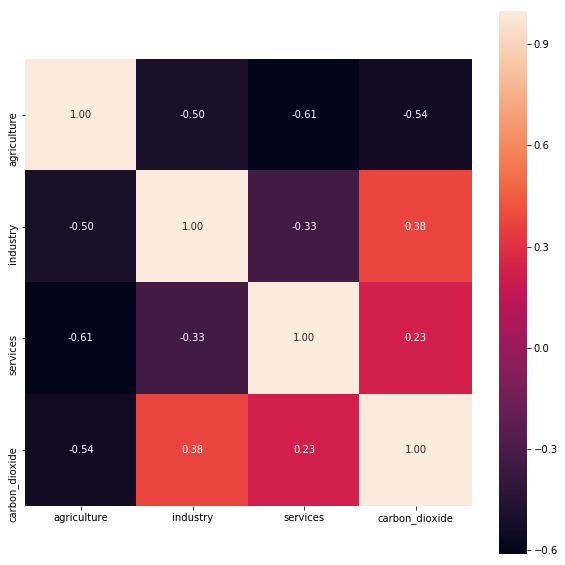

In [85]:
# Create heatmap with seaborn
plt.figure(figsize = (10, 10))
sns.heatmap(test.corr(), annot = True, fmt = ".2f", square = True)

plt.show()